# A Statistical Analysis on the Relative Competitiveness of Bug Pokemon

In [34]:
## Libraries to be used in statistical analysis
library(tidyverse)
library(infer)
library(repr)
library(RColorBrewer)
library(gridExtra)

## Introduction

Pokemon is one of the most renowned and influential media franchises, spanning across electronic gaming, animated series, and film. In recent years, the impact of Pokemon has evolved from being primarily Japanese to a global sensation (Tobin, 2004). According to Mäyrä (2017), Pokemon has transformed the landscape of digital gaming, moving it from the fringes of public life to a central and significant role in mainstream culture. This evolution marks not only a shift in gaming habits, but also an expansion of digital gaming culture, with Pokemon now a game that has spread across the world and has had a profound impact.
Our objective is to determine whether there exists a significant disparity of total power between Bug-type and non-Bug Pokemon. This study utilises the Pokemon dataset, encompassing data on 721 Pokemon with various stats and types. Our focus lies in comparing the mean total power of Bug-type and non-Bug Pokemon and determining whether there is a differential between these two. There are two main parts in the project: the inferential and hypothesis.
In our inference analysis, our objective is to contrast the total power between Bug-type Pokemon and non-Bug Pokemon, which reveals the strength of Pokemon through data comparison. Through the plots and point estimates we took, there are initial conclusions regarding the disparity in total power. However, to fortify the reliability of this project, it is necessary to proceed with a hypothesis analysis.
In the subsequent phase, we delve into a hypothesis analysis concerning the mean total power disparity between Bug-type and non-Bug Pokemon. This analysis hinges on two core hypotheses: the null hypothesis and the alternative hypothesis. Our focus is to calculate the p-value by test statistics and compare the p-value with the predetermined significance level, leading us to derive the necessary conclusion.
(296)

## Wrangling Data

In [35]:
## Reading and tidying data from file ##
original_pokemon <- read_csv("https://raw.githubusercontent.com/Kooriryuu/Stat201Group2/main/Pokemon.csv")
colnames(original_pokemon) <- gsub(" ", "_", colnames(original_pokemon))

## Wrangling Data (Removing legendaries and selecting relevant columns) ##
pokemon <- original_pokemon |>
    filter(!Legendary) |>
    select(Type_1, Type_2, Total) |>
    mutate(isBug = Type_1 == "Bug" | Type_2 == "Bug" & (!is.na(Type_2)))
head(pokemon)

Rows: 800 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Name, Type 1, Type 2
dbl (9): #, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation
lgl (1): Legendary

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Type_1,Type_2,Total,isBug
<chr>,<chr>,<dbl>,<lgl>
Grass,Poison,318,FALSE
Grass,Poison,405,FALSE
Grass,Poison,525,FALSE
Grass,Poison,625,FALSE
Fire,NA,309,FALSE
Fire,NA,405,FALSE


{*The dataset used in this report was obtained from Kaggle which gave this dataset an 8.8/10 regarding its usability, completeness, credibility and compatibility of the dataset.* \uneccessary?} \
We have filtered out legendary Pokémon, which could otherwise skew the results. Further, we selected only the columns relavent to focus on answering our question “Are Bug Pokemon weaker in power than non-Bug Pokemon?”.\
(61)

In [36]:
## Creating a sample (size = 30) of Bug and non-Bug Pokemon and calculating their sample means ##
set.seed(6969)
bug_sample <- pokemon |>
    filter(Type_1 == "Bug" | Type_2 == "Bug") |>
    sample_n(size = 30)

non_bug_sample <- pokemon |>
    filter(Type_1 != "Bug" & Type_2 != "Bug") |>
    sample_n(size = 30)

sample_means = tibble(
    bug_power = mean(bug_sample$Total),
    non_bug_power = mean(non_bug_sample$Total))
sample_means

## Creating a combined dataset of the two samples
combined_sample = rbind(bug_sample,non_bug_sample) |>
    mutate(isBug = Type_1 == "Bug" | Type_2 == "Bug" & (!is.na(Type_2)))
head(combined_sample)

bug_power,non_bug_power
<dbl>,<dbl>
376.3667,476.8667


Type_1,Type_2,Total,isBug
<chr>,<chr>,<dbl>,<lgl>
Bug,Fighting,600,TRUE
Bug,NA,195,TRUE
Bug,Poison,395,TRUE
Bug,NA,194,TRUE
Bug,Poison,390,TRUE
Bug,Steel,484,TRUE


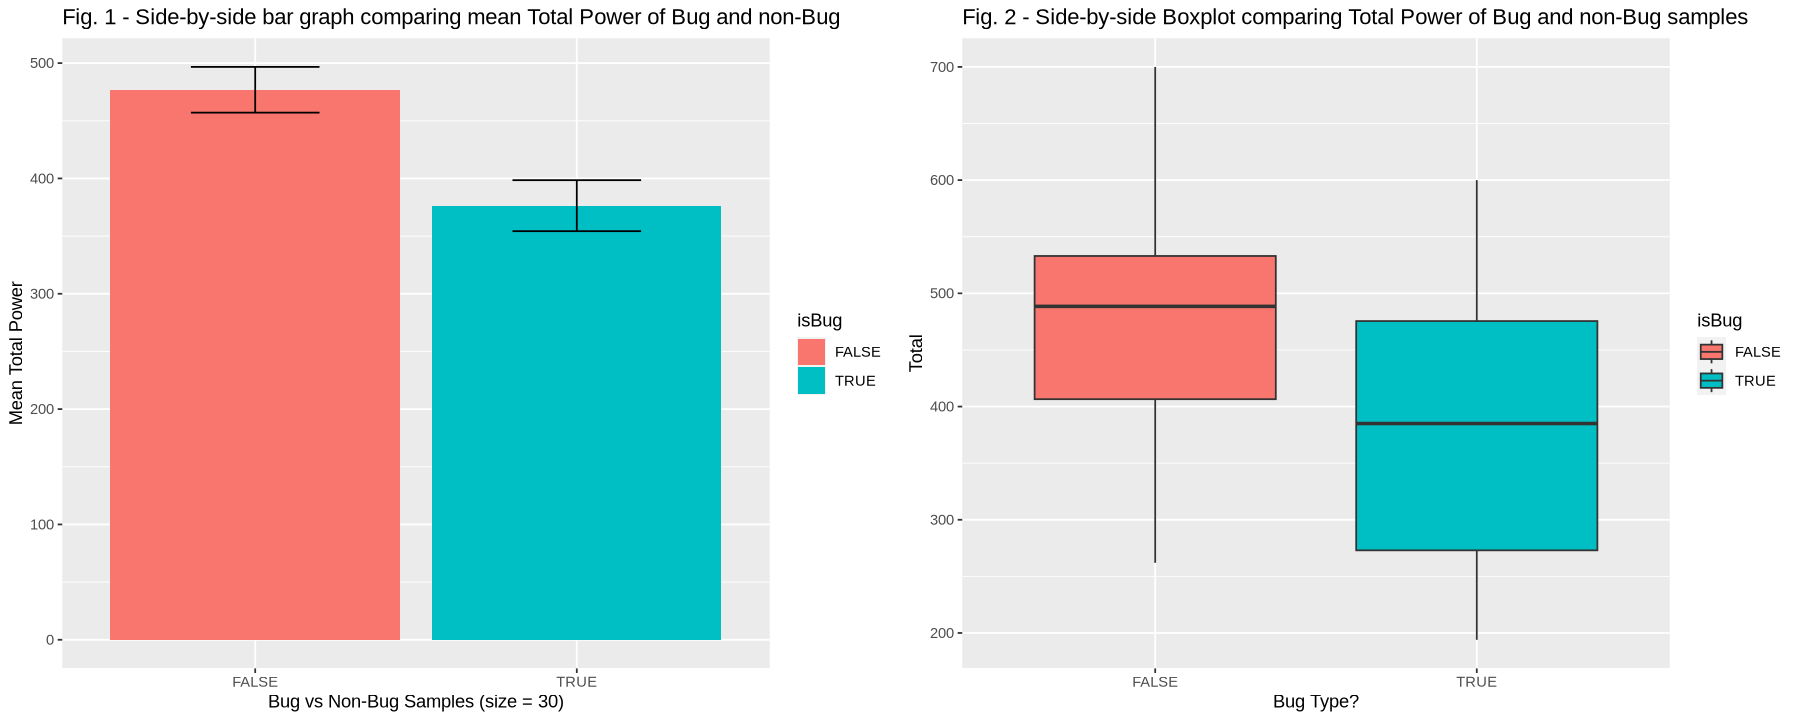

In [37]:
## Visualising difference in total power ##
options(repr.plot.width = 15)
### Side-by-side bar graph visualising the mean and standard deviation of Bug and non-Bug samples ### 
pokemon_plot <- combined_sample |>
    group_by(isBug) |>
    summarise(meanTotal = mean(Total),
             std_d = sd(Total) / sqrt(n())) |>
    ggplot() +
    geom_col(aes(x=isBug, y=meanTotal, fill = isBug)) +
    geom_errorbar(aes(x = isBug, ymin=meanTotal-std_d, ymax=meanTotal+std_d), width=0.4) +
    ggtitle("Fig. 1 - Side-by-side bar graph comparing mean Total Power of Bug and non-Bug") +
    xlab("Bug vs Non-Bug Samples (size = 30)") +
    ylab("Mean Total Power")

### Side-by-side boxplot shwing the numerical summary of Total Power of Bug and non-Bug samples ###
box_plot <- combined_sample |>
    ggplot(aes(x = isBug, y = Total, fill = isBug)) +
    geom_boxplot() + 
    ggtitle("Fig. 2 - Side-by-side Boxplot comparing Total Power of Bug and non-Bug samples") +
    xlab("Bug Type?")

grid.arrange(pokemon_plot, box_plot, ncol=2)

In Figures 1 and 2, we observe both mean and median Total Power of Bug is lower than non-Bug Pokemon, providing evidence to support our hypothesis. \
(26)

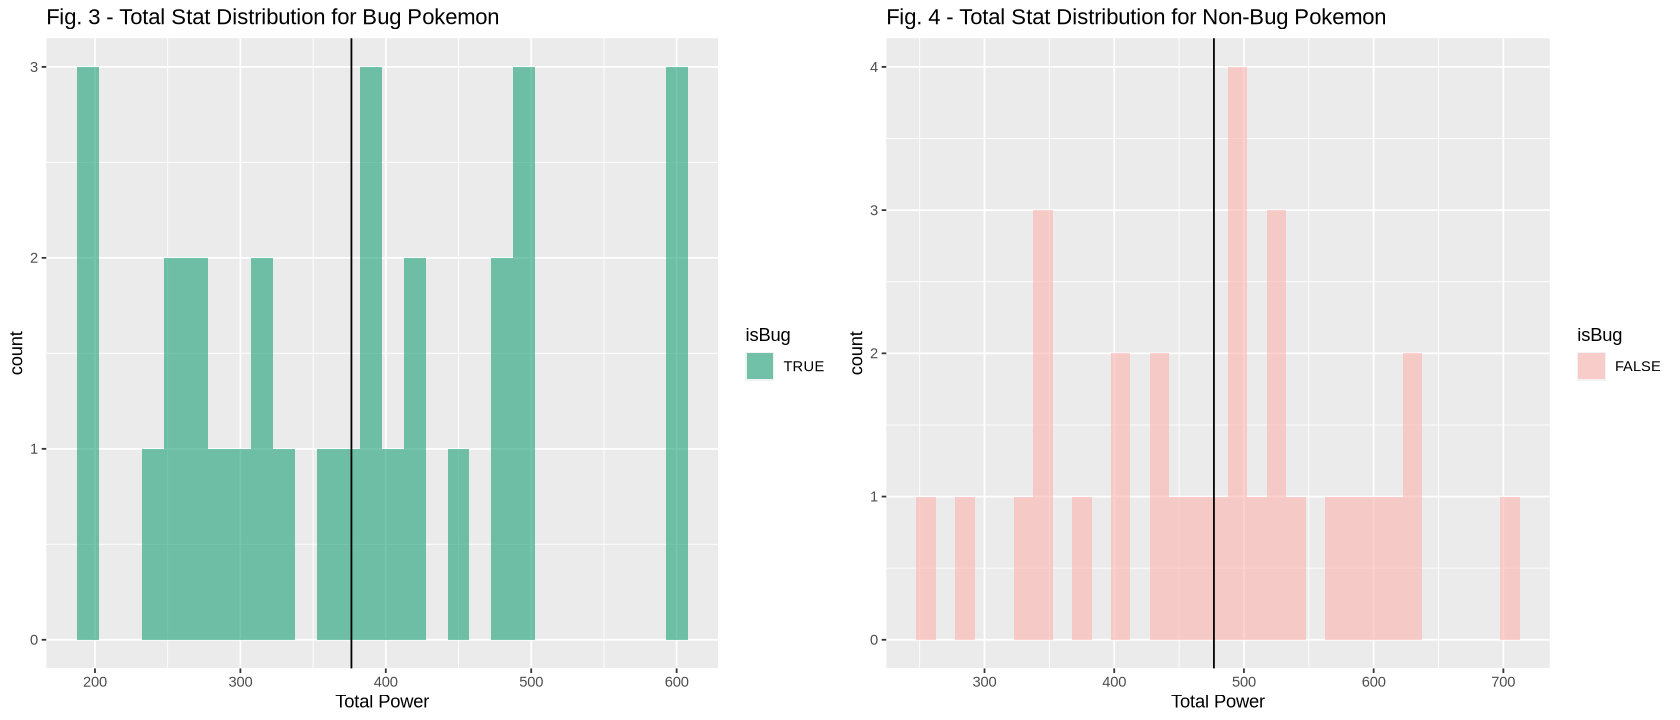

In [38]:
## Side-by-side visualisation of Bug and non-Bug sample distributions ##
options(repr.plot.width = 14)

bug_sample_dist <- bug_sample |>
    ggplot(aes(x = Total, fill = isBug)) +
    geom_histogram(binwidth = 15, alpha = 0.6, position = position_dodge(width = 5 )) +
    ggtitle("Fig. 3 - Total Stat Distribution for Bug Pokemon") +
    xlab("Total Power") +
    scale_fill_brewer(palette="Dark2") +
    geom_vline(aes(xintercept=sample_means$bug_power))

non_bug_sample_dist <- non_bug_sample |>
    ggplot(aes(x = Total, fill = isBug)) +
    geom_histogram(binwidth = 15, alpha = 0.6, position = position_dodge(width = 5 )) +
    ggtitle("Fig. 4 - Total Stat Distribution for Non-Bug Pokemon") +
    xlab("Total Power") +
    scale_fill_brewer(palette="Pastel1") +
    geom_vline(aes(xintercept=sample_means$non_bug_power))

grid.arrange(bug_sample_dist, non_bug_sample_dist, ncol=2)

In Figures 3 and 4, we compare the sample distribution of Total Power in our Bug and non-Bug samples. We observe Figure 3 is centred around a mean which is lower than in Figure 4, suggesting evidence to support our hypothesis. \
(41)

## Methodology
While our preliminary results support our initial claim of bug inferiority, the findings are insufficient to conclude statistical significance. There is no way to ascertain whether any observed differences are statistically meaningful or just the result of sample variations. Therefore, we will employ both theory-based and bootstrapping methods to statistically analyse our research question.
We will conduct a theory-based hypothesis test to ascertain whether the average Total Power of Bug-type Pokémon significantly less than the average total power of the population at a 5% significance level. This two-sample t-test will provide a clear conclusion about the statistical significance of  total power differences:

<p style="text-align: center;">Null Hypothesis : The true Mean Total power of Bug Pokemon is equal to the  true mean total power of Non-Bug Pokemon.</p>
<p style="text-align: center;">Alternative Hypothesis: The true Mean Total power of Bug Pokemon is less than the true Mean Total power of non-Bug pokemon.</p>

In addition, we will use bootstrapping to construct a confidence interval of the difference in means between non-Bug and Bug type Pokemon at a 95% confidence level. Using the infer package, we generate 2000 bootstrap samples of size 30 from a combined sample of 30 Bug and 30 non-Bug type Pokemon and calculate the difference in mean Total Power (non-Bug Type – Bug Type). From this we construct our confidence interval at a 95% confidence level  (1 - alpha). If our confidence interval does not capture 0, and the difference is positive, we are 95% confident that the difference in mean is greater than 0 (i.e. non-Bug Pokemon have higher mean Total Power than Bug Pokemon).

Finally, we will use bootstrapping to construct a confidence interval at a 95% level to estimate the true standard deviation of our population. \
(284)

## Theory-Based Hypothesis Testing

We are conducting a two-sample t-test, at a significance level of $\alpha = 0.05$, to determine whether there is a significant difference in mean Total Power between Bug and non-Bug Pokemon. For this hypothesis test, we are using: $$H_0:\mu_0 - \mu_1 = 0$$
$$H_A : \mu_0 - \mu_1 > 0$$
where $\mu_0$ represents the mean of non-bug pokemon and $\mu_1$ represents the mean of bug pokemon. The first step is to calculate the test statistic, using the formula 
$$
T = \frac{\mu_0 - \mu_1 - d_0}{\sigma }
$$
where we estimate the standard error $\sigma$ to be, $$\sigma = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} $$
where $s^2$ represents sample variance and $n$ represents the sample size. \
(79)

In [39]:
#Calculating the mean of each sample
mean_bug <- mean(bug_sample$Total)
mean_nonBug <- mean(non_bug_sample$Total)

#Calculating the variance of each sample
var_bug <- var(bug_sample$Total)
var_nonBug <- var(non_bug_sample$Total)

#Calculating the standard error
n1 <- 30
n0 <- 30
sigma <- sqrt(var_bug/n1 + var_nonBug/n0)
sigma

[1] 29.69327

Our standard error is found to be about 29.6932. \
(9)

In [40]:
#Calculating test statistic using the given formula
test_stat <- (mean_nonBug - mean_bug)/(sigma)
test_stat

[1] 3.384606

The test statistic is found to be about 3.3846. To calculate the likelihood of this value occuring, we can determine the p value through the use of the function pt. However, pt requires an argument for degrees of freedom. The degrees of freedom of this t-test is calculated through
$$\nu = \frac{
    \left(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\right)^2
}
{
\frac{s_1^4}{n_1^2(n_1-1)}+\frac{s_2^4}{n_2^2(n_2-1)}
}
$$
and then rounded down to the next integer. \
(57)

In [41]:
#Calculating the degrees of freedom
n <- 30
df <- floor(sigma^4/(var_bug^2/(n^2*(n-1)) + var_nonBug^2/(n^2*(n-1))))
df

[1] 57

The degrees of freedom ($\nu$) equals 57. Now, the p value of the null hypothesis can be determined. \
(17)

In [42]:
#Calculating the p value
p_val <- pt(test_stat, df, lower.tail = FALSE)
p_val

[1] 0.0006477801

Since our p-value (0.0648%) is less than our 5% significance level, we reject the null hypothesis.

**Conclusion: There is sufficient evidence to suggest Bug type Pokemon are weaker than non-Bug Type Pokemon.** \
(31)

## Simulation-Based Bootstrapping to construct Difference in Means Confidence Interval

To validate our theory-based testing, we can also use bootstrapping to construct a confidence interval for the difference in mean Total Power of non-Bug and Bug Pokemon at a 95% confidence level ($ 1 - \alpha$). \
(32)

In [43]:
## Using infer package, generate bootstrap distribution of the difference in means between non-Bug and Bug Pokemon
##    Note: order of difference goes (Non-Bug - Bug)
set.seed(6969)

bootstrap_dist <- combined_sample |>
    specify(formula = Total ~ isBug) |>
    generate(reps = 2000, size = 30, type = "bootstrap") |>
    calculate(stat = "diff in means", order =c(FALSE, TRUE))

head(bootstrap_dist)

replicate,stat
<int>,<dbl>
1,72.26286
2,110.50000
3,75.16667
4,84.79083
5,97.34149
6,145.27586


In [44]:
## Get Confidence Interval at 95% confidence level
ci <- bootstrap_dist |>
    get_ci(0.95)

ci

lower_ci,upper_ci
<dbl>,<dbl>
40.91781,154.0944


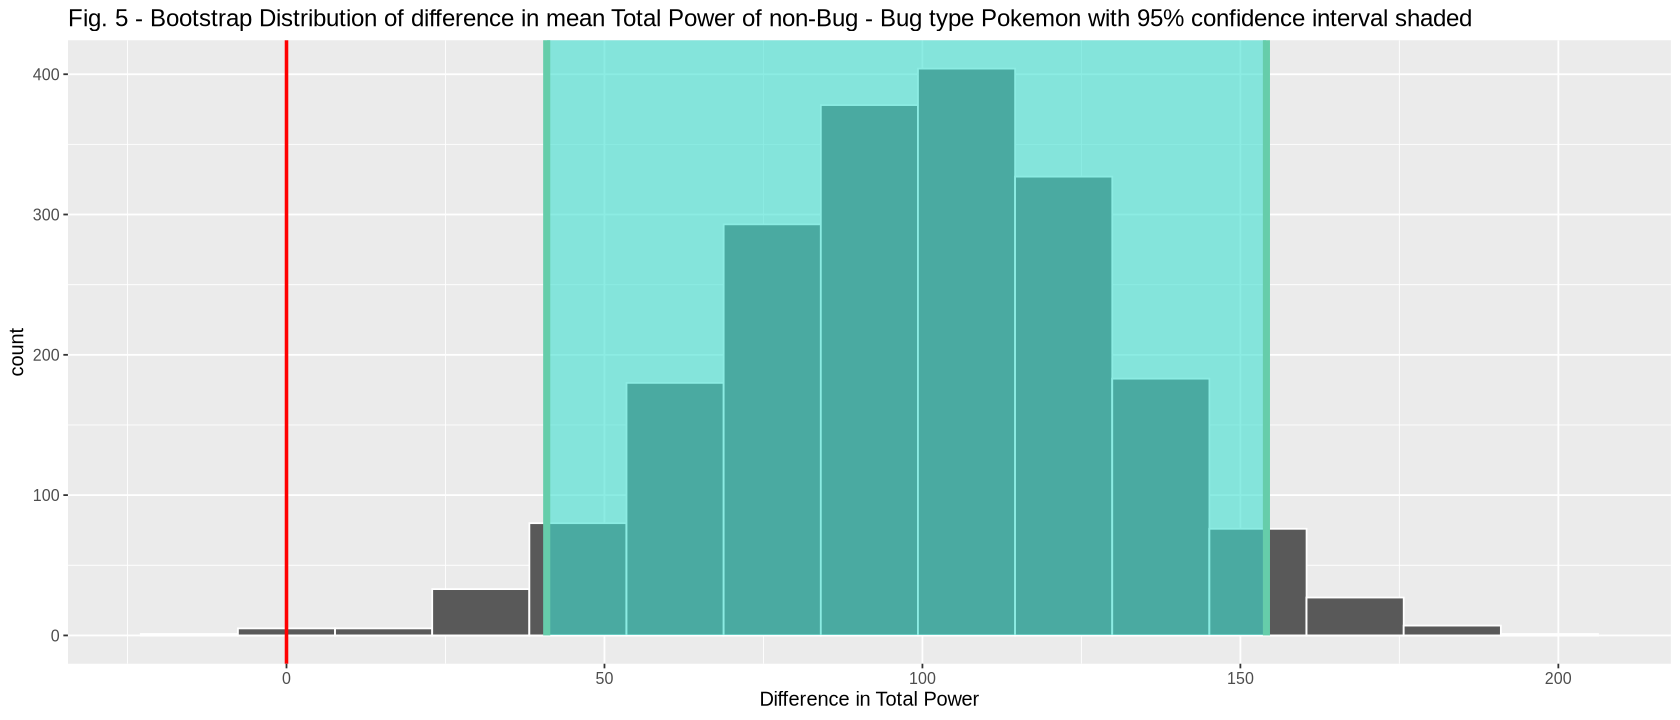

In [45]:
## Visualising bootstrap distribution with shaded confidence intervals and marked Δ = 0 
options(repr.plot.width = 14)
ci_plot <-bootstrap_dist|>
    visualise() +
    shade_ci(ci) +
    geom_vline(xintercept=0, linewidth = 1, colour = "red") +
    xlab("Difference in Total Power") +
    ggtitle("Fig. 5 - Bootstrap Distribution of difference in mean Total Power of non-Bug - Bug type Pokemon with 95% confidence interval shaded") +
    theme(text = element_text(size = 12))

ci_plot

From our confidence interval, we observe that the range of values where the true difference in means could lie does not capture 0. Further, we see a positive difference in means in non-Bug mean Total Power - Bug mean Total Power.

Therefore, we can conclude with a 95% confidence level non-Bug Pokemon have higher mean Total Power than Bug Pokemon. \
(59)

## Simulation-Based Bootstrapping to construct Standard Deviation Confidence Interval

We can also use simulation-based bootstrapping to construct a confidence interval where in the true standard deviation of Total Power of our population could lie at a 95% confidence level.

lower_ci,upper_ci
<dbl>,<dbl>
40.91781,154.0944


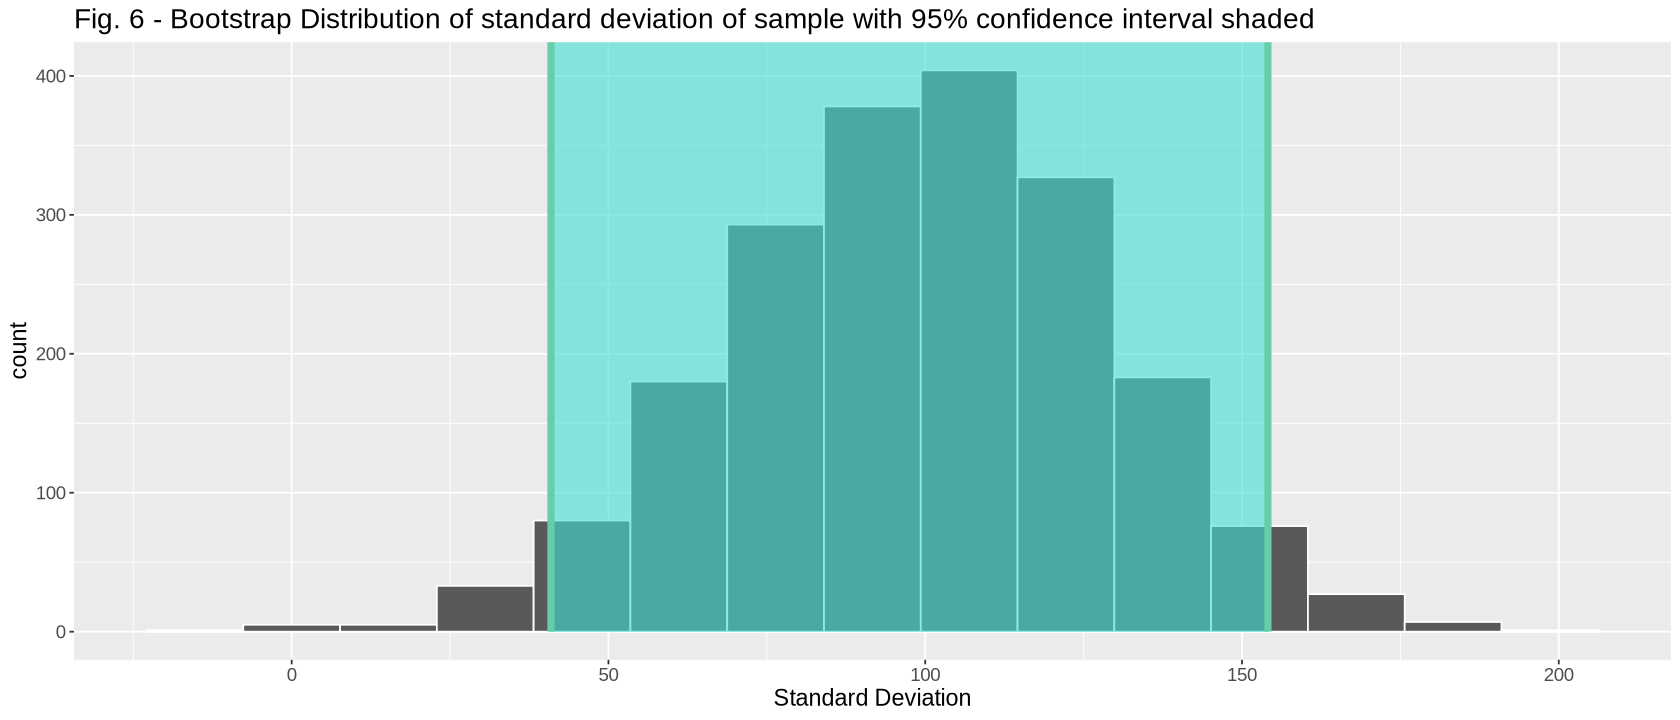

In [46]:
bootstrap_dist_sd <- combined_sample |>
    specify(response =  Total) |>
    generate(reps = 2000, size = 30, type = "bootstrap") |>
    calculate(stat = "sd")

ci_sd <- bootstrap_dist |>
    get_ci(0.95)

#combined_sample
ci_plot_sd <-bootstrap_dist|>
    visualise() +
    shade_ci(ci) +
    xlab("Standard Deviation") + 
    ggtitle("Fig. 6 - Bootstrap Distribution of standard deviation of sample with 95% confidence interval shaded") +
    theme(text = element_text(size = 14))

ci_plot_sd
ci_sd

From Figure 6, we can observe that the range of values wherein the true standard deviation of Total Power of Pokemon could lie is between 41-154 (0.dp) \
(25)

## Discussion
Our study employed both simulation-based, and theory-based methods to answer our question of whether Bug Pokemon are less powerful than non-Bug Pokemon. Our population is all Pokemon, and our variables of interest are Total Power, and Type (specifically if the Pokemon is Bug Type). We used a theory-based hypothesis test at a 5% significance level, and assumed no difference in mean Total Power between Bug and non-Bug Pokemon as our null hypothesis. This one-tailed two-sample t-test was further supported by a simulation-based confidence interval which looked at the range of values wherein the true difference in mean Total Power between Bug and non-Bug Pokemon could lie at a 95% significance level. As both tests rejected the null hypothesis, we can conclude there is sufficient evidence to suggest Bug Pokemon have lower Total Power compared to non-Bug Pokemon. This conclusion is in-line with our preliminary findings. \
(145)


## Significance and Further Questions
Our study impacts professional Pokemon trainers who need to optimise performance when forming their teams, as well as game designers who need to balance the game and make it more enjoyable for fans and professional players.

Our findings lead to potential questions regarding the balancing of Bug-type Pokmeon and non-Bug-type Pokemon:

One question is how can Bug-type Pokemon be balanced in future game releases to make-up for their lower Total Power? This could involve introducing new moves, abilities, or stat adjustments to ensure a more equitable distribution of power among different Pokemon types. Specifically, it may be good game design to specialise Bug-types in one particular stat, like Speed. \
(109)


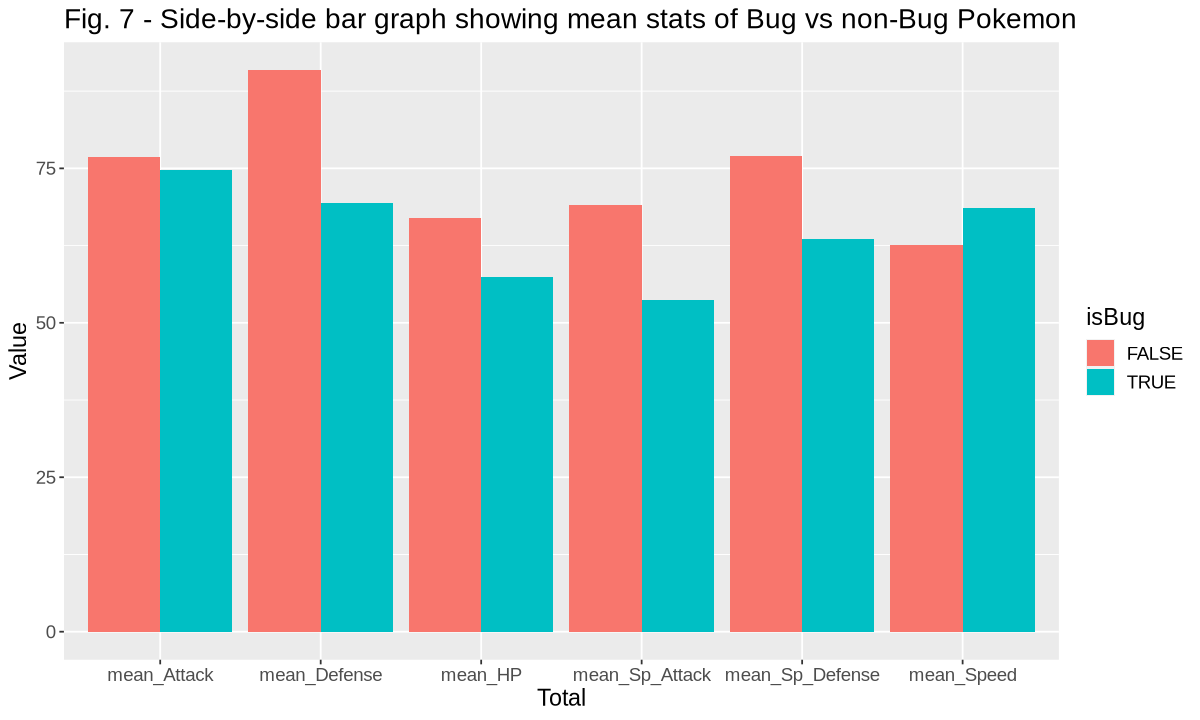

In [47]:
set.seed(100)
options(repr.plot.width = 10, repr.plot.height = 6)
original_pokemon <- original_pokemon |> filter(!Legendary)

## create mean stats for Bug sample (size = 30)
bug_stats <- original_pokemon |>
    filter(Type_1 == "Bug" | Type_2 == "Bug") |>
    sample_n(size = 30) |>
    summarise(isBug = TRUE,
           mean_HP = mean(HP),
           mean_Attack = mean(Attack),
           mean_Defense = mean(Defense),
           mean_Sp_Attack = mean(Sp._Atk),
           mean_Sp_Defense = mean(Sp._Def),
           mean_Speed = mean(Speed))

## calculating mean stats for non-Bug sample (size = 30)
non_bug_stats <- original_pokemon |>
    filter(Type_1 != "Bug" & Type_2 != "Bug") |>
    sample_n(size = 30) |>
    summarise(isBug = FALSE,
           mean_HP = mean(HP),
           mean_Attack = mean(Attack),
           mean_Defense = mean(Defense),
           mean_Sp_Attack = mean(Sp._Atk),
           mean_Sp_Defense = mean(Sp._Def),
           mean_Speed = mean(Speed))

summary_data = rbind(bug_stats,non_bug_stats) |>
    gather(Total, Value, -isBug)

## visualsing data in side-by-side bar graph
summary_plot <- summary_data |>
    ggplot(aes(x = Total, y = Value, fill = isBug)) +
    geom_col(position = "dodge") +
    ggtitle("Fig. 7 - Side-by-side bar graph showing mean stats of Bug vs non-Bug Pokemon") +
    theme(text = element_text(size = 14))

summary_plot

As we can see in Figure 7, our Bug-type sample has a higher average speed stat when compared to non-Bug-types. This preliminary findings could mean Bug-types have a higher speed stat than non-Bug-types, but further investigation is necessary. \
(38)

Another potential question could involve a statistical analysis of how other Types compare to the general Pokemon population. For example, are Fire-type Pokemon stronger than the general population? \
(28)

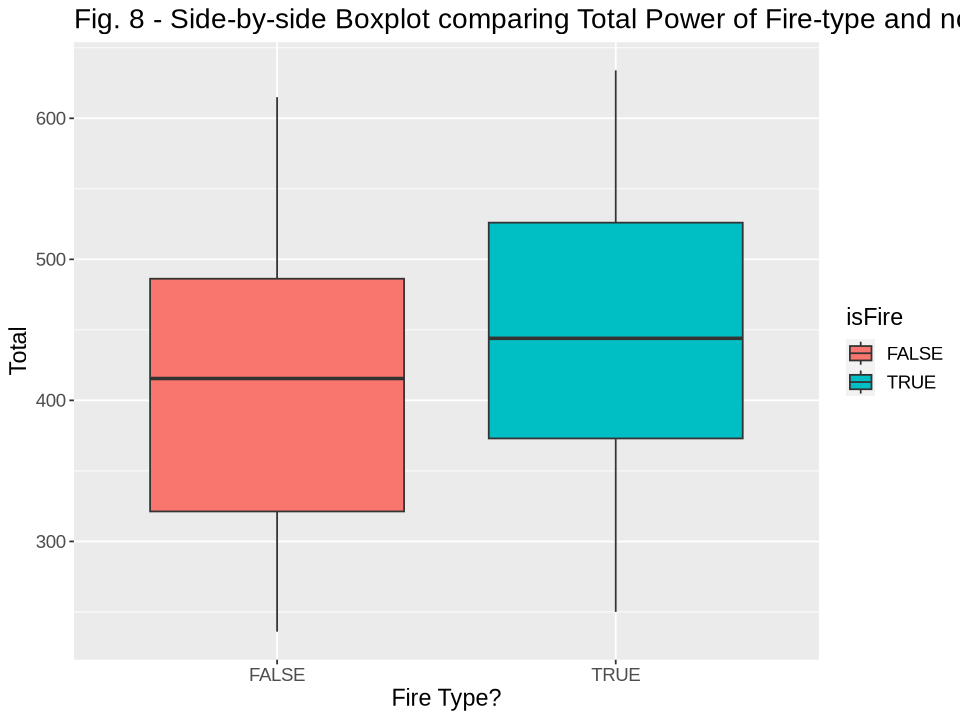

In [48]:
set.seed(1000)
options(repr.plot.width = 8)
## Creating sample of size 30 of Fire-type Pokemon
fire_sample <- pokemon |>
    filter(Type_1 == "Fire" | Type_2 == "Fire") |>
    sample_n(size = 30)

## Creating sample (size = 30) of non-Fire-type Pokemon
non_fire_sample <- pokemon |>
    filter(Type_1 != "Fire" & Type_2 != "Fire") |>
    sample_n(size = 30)

## Creating a combined dataset of the two samples
combined_fire_sample = rbind(fire_sample,non_fire_sample) |>
    mutate(isFire = Type_1 == "Fire" | Type_2 == "Fire" & (!is.na(Type_2)))

## Visualising data in side-by-side box-plot
fire_box_plot <- combined_fire_sample |>
    ggplot(aes(x = isFire, y = Total, fill = isFire)) +
    geom_boxplot() + 
    ggtitle("Fig. 8 - Side-by-side Boxplot comparing Total Power of Fire-type and non-Fire-type Samples") +
    xlab("Fire Type?") +
    theme(text = element_text(size = 14))
fire_box_plot

As we can see in Figure 8, the sample of Fire-type Pokemon have a mean Total Power higher than the non-Fire-type sample. However, further investigation involving theory-based and simulation-based methods is necessary for a conclusion to be reached. \
(38)

## References

Barradas, A. (2016). Kaggle.com. Pokemon with stats. Retrieved from https://www.kaggle.com/datasets/abcsds/pokemon/data.

Mäyrä, F. (2017). Pokémon GO: Entering the Ludic Society. Mobile Media & Communication, 5(1), 47-50. https://doi.org/10.1177/2050157916678270

Tobin, J., Buckingham, D., Sefton-Green, J., Allison, A., & Iwabuchi, K. (2004). Pikachu's global adventure: The rise and fall of pokémon (1st ed.). Duke University Press. https://doi.org/10.1515/9780822385813

Word Count: 1305